# Overview

* Intensive Care Units (ICUs) are continually faced with the difficulty of monitoring patients for the development of sepsis (an infection that can accrue while staying in ICU).

* While this challenge is not new and have been around for few years, the recent COVID- 19 pandemic has significantly increase its prominence. 

***Therefore, for an ICU, the ability to predict whether a patient stay in ICU will develop a sepssis or not during their stay in the ICU, is extremely beneficial.*** 

* This is the motivation for developing the machine learning model. There are two main purposes: 

1. Reducing the risk of health complications.
2. Manage the ICU resources (such as bed availability, etc.).

* The training dataset provides list of essential attributes (features) related to: patient characteristics, diagnoses, treatments, services, hospital charges and patients socio-economic background.

solve The Greedy Gnomes Problem using both exhaustive search algorithms and dynamic programming algorithms, and then compare their performances. solve The Greedy Gnomes Problem using both exhaustive search algorithms and dynamic programming algorithms, and then compare their performances. 

# Introduction 
In this jupyter notebook, there are 3 algorithms including Decision Tree, Random Forest and Logistic Regression each with more than 1 model will be implemented. After each model runs, there is an analysis and justifications will be carefully discussed. This will based on pre-defined criteria and problem context to detect whether the model is efficient or not. Finally, based on the created criteria, context and machine learning performance, the best approach will be chosen to be modified and recommended to be used in practice.


# Approach

# Import statement


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
!pip3 install imblearn

# Read and convert csv file

In [3]:
train_dt = pd.read_csv('Paitients_Files_Train.csv')
test_dt = pd.read_csv('Paitients_Files_Test.csv')
prediction_dt = pd.read_csv('S3751881_predictions.csv')


# Exploratory Data Analysis

### Training data initial analysis

In [4]:
# print data frame shape
print('Train dataset Frame shape: {}'.format(train_dt.shape))
print('-----------------------------------------')
# save row count
rowsdf = train_dt.shape[0]
# columns and their types
print('Data Frame Dtypes')
train_dt.dtypes

Train dataset Frame shape: (599, 11)
-----------------------------------------
Data Frame Dtypes


ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [20]:
train_dt.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* From the description of train data above, we can notice that the mean of `PRG` and `BD2` are pretty far from the mean of other columns Also,`SK`'s mean is quite far compared to other columns's mean. These differences in the ranges of initial features may provide significant difficulties for many machine learning methods. For example, if one of the attributes has a wide range of values, the distance will be determined by this feature.

* From the min and max of colum `Age` we can see that the age that have on this medical dataset is from 21-year-old youth to 81-year-old elderly 

* Blood Pressure `PR` and body mass index `M11` have some suspicious values (equal <bold>0<bold>). We need to carefully research about these data insights for applying appropriate preprocessing techniques

In [21]:
train_dt.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [22]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [23]:
train_dt.shape

(599, 11)

* The data shape and all non-null count values from the dataset information can probably tell us that this dataset does not contain any null or nan values - which is pretty clean dataset. However, in order to carefully prepare for the model I will double check each column to make sure there is no null or nan data

### Testing data initial analysis

In [24]:
# print data frame shape
print('Test dataset Frame shape: {}'.format(test_dt.shape))
print('-----------------------------------------')
# save row count
rowsdf = test_dt.shape[0]
# columns and their types
print('Data Frame Dtypes')
test_dt.dtypes

Test dataset Frame shape: (169, 10)
-----------------------------------------
Data Frame Dtypes


ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

In [25]:
test_dt.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


* From the description of train data above, we can notice that the mean of `PRG` and `BD2` are pretty far from the mean of other columns Also,`SK`'s mean is quite far compared to other columns's mean. These differences in the ranges of initial features may provide significant difficulties for many machine learning methods.

* From the min and max of colum `Age` we can see that the age that have on this medical dataset is from 21-year-old youth to 70-year-old elderly. In the <bold> training dataset </bold> the maximum age is 81 this would make the prediction of the model might face downgrade in accuracy in test dataset

* Blood Pressure `PR` and body mass index `M11` have some suspicious values (equal <bold>0<bold>). We need to carefully research about these data insights for applying appropriate preprocessing techniques

In [26]:
test_dt.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [27]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


### Prediction Dataset

In [28]:
print('Prediction dataset Frame shape: {}'.format(prediction_dt.shape))
print('-----------------------------------------')
# columns and their types
print('Data Frame Dtypes')
prediction_dt.dtypes

Prediction dataset Frame shape: (169, 2)
-----------------------------------------
Data Frame Dtypes


ID\t        object
Sepssis    float64
dtype: object

In [29]:
prediction_dt.head()

,ID\t,Sepssis
0,ICU200609\t\t\t\t\t,NaN
1,ICU200610\t\t\t\t\t,NaN
2,ICU200611\t\t\t\t\t,NaN
3,ICU200612\t\t\t\t\t,NaN
4,ICU200613\t\t\t\t\t,NaN


## Drop columns

Since we want to drop columns `ID` and `Insurance` for training since they do not play a significant in the target column - `Sepssis` -> We can drop it for better model

In [30]:
train_dt = train_dt.drop(['ID','Insurance'],axis=1)
test_dt = test_dt.drop(['ID','Insurance'],axis=1)

* Check to make sure if we have successfully dropped out these 2 columns

In [31]:
print('Train dataset shape {}'.format(train_dt.shape))
print('Test dataset shape {}'.format(test_dt.shape))


Train dataset shape (599, 9)
Test dataset shape (169, 8)


* The number of columns in both datasets reduces 2 from the initial datasets. 
* 11 -> 9 and 10 -> 8

## Histogram to see each columns distribution

### Training dataset distribution visualization

<Figure size 432x288 with 0 Axes>

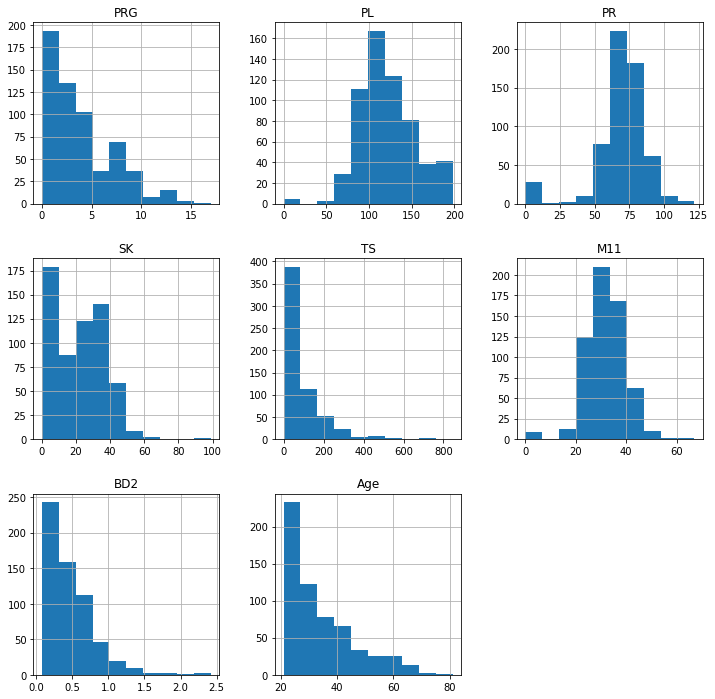

In [32]:
plt.figure()
train_dt.hist(figsize=(12, 12))
plt.show()

* The historgram shows that columns such as `PL`, `PR`, and `M11` have a nearly normal distribution. 

* Columns such as `PRG`, `SK`, `TS`, `BD2`, and `Age` are somehow right skewed. 

* Columns `PL`, `M11` and `PR` have a few suspicious data points with value of 0 which is far from their distribution -> These records can be outliers and are something we must look into carefully in preprocessing process. 

* The sample age is biase as we see more youth than elderly people. 


### Testing dataset distribution visualization

<Figure size 432x288 with 0 Axes>

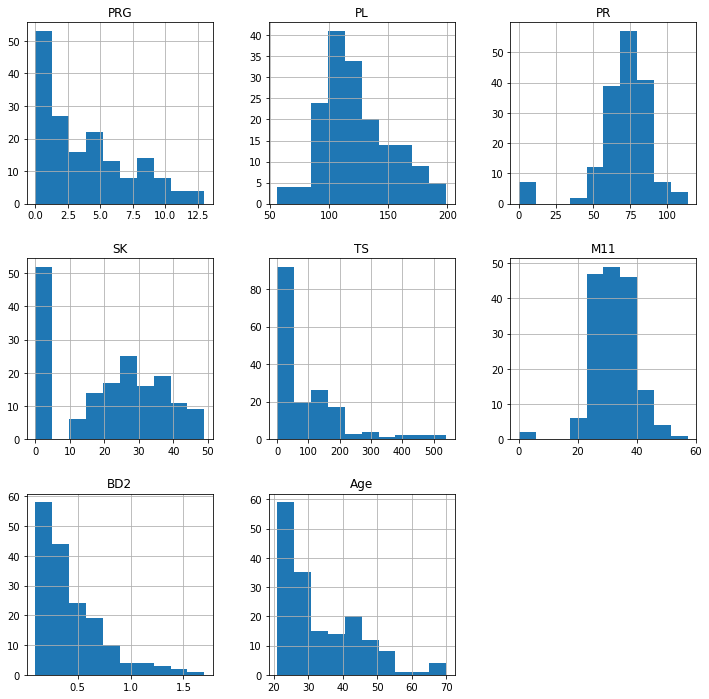

In [33]:
plt.figure()
test_dt.hist(figsize=(12, 12))
plt.show()


* The historgram shows that columns such as `PL`,`PR` and `M11` have a nearly normal distribution. Both columns have records with value of 0 just like those on training dataset. 

* Columns such as `PRG`, `SK`, `TS`, `BD2`, and `Age` are somehow right skewed. 

* `PR` and `M11` have some suspicious record with value 0 

* Detail on each column will be discussed detailly in the below section
-> Although not identical to the training dataset, we can see the testing dataset somehow have quite similar distribution as the training dataset

# Prepocessing 

## Column Age

In [34]:
train_dt['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      50
1      31
2      32
3      21
4      33
       ..
594    34
595    22
596    46
597    21
598    38
Name: Age, Length: 599, dtype: int64>

<AxesSubplot:xlabel='Age', ylabel='Count'>

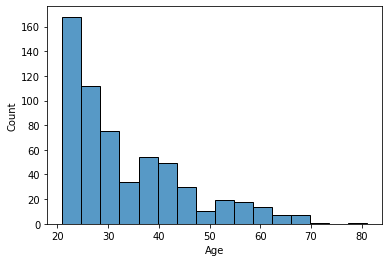

In [35]:

sns.histplot(x='Age',data=train_dt)


* From the distribution of this column in the training dataset, we can see that there is a few records of people above 70 -> These records can be outliers that might cause downgrade to the machine learning model if not appropriately cleaned. 

* The dataset has more values on the youth medical record (from 20 to under 40 years old) -> This can cause biase in the result if the test data have more youth than elderly -> The accuracy will be higher than the test set that have more elderly than youth  


<AxesSubplot:xlabel='Age', ylabel='Count'>

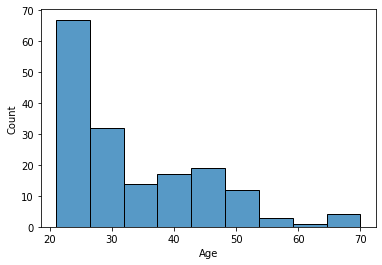

In [36]:
sns.histplot(x='Age',data=test_dt)


**Data is biase as the sample size of youth aging in 20 to 30 is more than other age category.**

<AxesSubplot:xlabel='Age'>

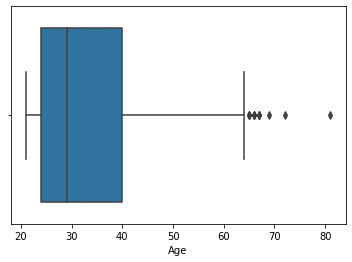

In [37]:
sns.boxplot(x='Age',data=train_dt)

<AxesSubplot:xlabel='Age'>

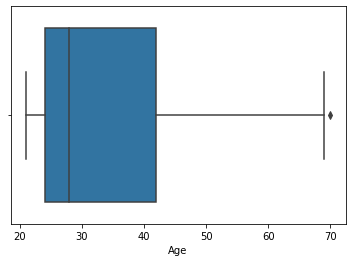

In [38]:
sns.boxplot(x='Age',data=test_dt)

In [39]:
null_train_age = train_dt['Age'].isna().sum()
null_test_age = train_dt['Age'].isna().sum()
print('Train dataset sum of null values {}'.format(null_train_age))
print('Test dataset sum of null values {}'.format(null_test_age))


Train dataset sum of null values 0
Test dataset sum of null values 0


In [40]:
#Check specific number of record with people who are older than 70 years old
train_dt[train_dt['Age']>70]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
453,2,119,0,0,0,19.6,0.832,72,Negative
459,9,134,74,33,60,25.9,0.460,81,Negative


In [41]:
test_dt[train_dt['Age']>70].shape[0]

/var/folders/qs/m5w6bzsn1fz5jfs1rq4ccsv40000gn/T/ipykernel_61026/1229189570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_dt[train_dt['Age']>70].shape[0]


0

### PRG	

<AxesSubplot:xlabel='PRG', ylabel='Count'>

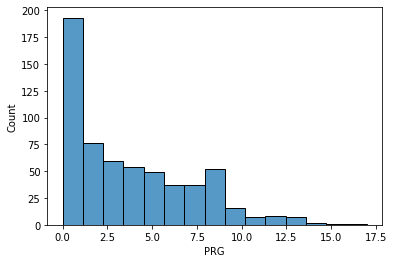

In [42]:
sns.histplot(x= 'PRG', data=train_dt)

<AxesSubplot:xlabel='PRG', ylabel='Count'>

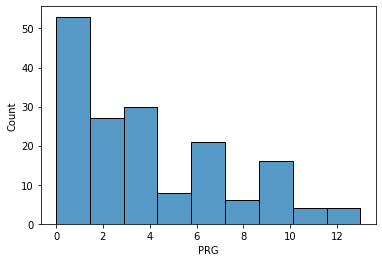

In [43]:
sns.histplot(x= 'PRG', data=test_dt)

<AxesSubplot:xlabel='PRG'>

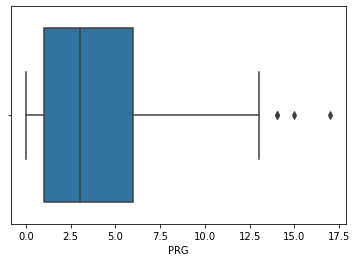

In [44]:
sns.boxplot(x='PRG', data= train_dt)

<AxesSubplot:xlabel='PRG'>

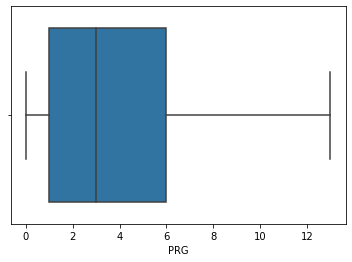

In [45]:
sns.boxplot(x='PRG', data= test_dt)

In [46]:
null_train_prg = train_dt['PRG'].isna().sum()
null_test_prg = train_dt['PRG'].isna().sum()
print('Train dataset sum of null values {}'.format(null_train_prg))
print('Test dataset sum of null values {}'.format(null_test_prg))


Train dataset sum of null values 0
Test dataset sum of null values 0


I decided not do perform any outlier's drop as it is still lack of insight to know how the `PRG` actually affects the `Sepssis`. Therefore this column is better left original

### PR ( Blood Pressure)


<AxesSubplot:xlabel='PR', ylabel='Count'>

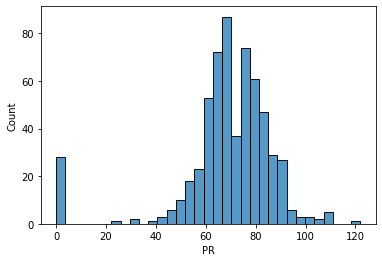

In [47]:
sns.histplot(x= 'PR', data=train_dt)

<AxesSubplot:xlabel='PR', ylabel='Count'>

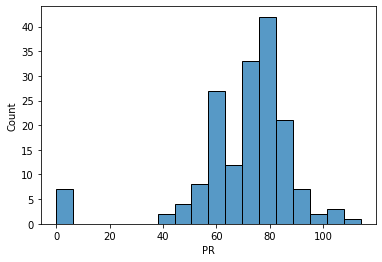

In [48]:
sns.histplot(x= 'PR', data=test_dt)

* From my observation, in the PR results in both datasets have records with value of 0. 

* According to [], researcher reported that it is impossible to have blood pressure equal 0. So these values can be seen as impossible value, this can be caused by mistake data entry process. These data must be cleaned before the training process 

<AxesSubplot:xlabel='PR'>

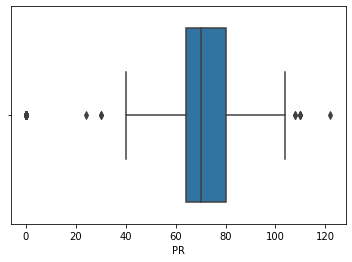

In [49]:
sns.boxplot(x='PR',data=train_dt)

<AxesSubplot:xlabel='PR'>

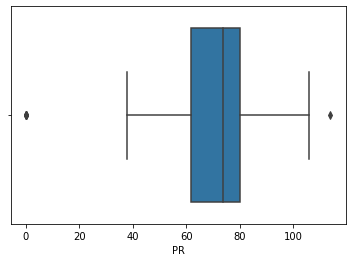

In [50]:
sns.boxplot(x='PR',data=test_dt)

In [51]:
null_train_pr= train_dt['PR'].isna().sum()
null_test_pr= test_dt['PR'].isna().sum()

print('Train dataset sum of null values {}'.format(null_train_pr))
print('Test dataset sum of null values {}'.format(null_test_pr))


Train dataset sum of null values 0
Test dataset sum of null values 0


In here we must check the number of record with value of 0 in both datasets

In [52]:
print(train_dt[train_dt['PR']==0].shape[0])
print("Sum of record with value of 0 is {}".format(train_dt[train_dt['PR']==0].shape[0]))

28
Sum of record with value of 0 is 28


In [53]:
# print(test_dt[test_dt['PR']==0])
print("Sum of record with value of 0 is {}".format(test_dt[test_dt['PR']==0].shape[0]))

Sum of record with value of 0 is 7


In [54]:
train_dt['PR'] = train_dt['PR'].replace(0,train_dt['PR'].mean())
test_dt['PR'] = test_dt['PR'].replace(0,test_dt['PR'].mean())
# train_dt = train_dt[train_dt['PR']<=120]

* In order to correct both datasets, we want this process to be less complicated as possible. Therefore, mean imputation is brought into usage as mean imputation works well with small numerical (same characteristic to out dataset - with 599 rows only)

In [55]:
print(train_dt.shape)
print(test_dt.shape)

(599, 9)
(169, 8)


### PL (Blood Work Result-1 (mu U/ml)                                                        

<AxesSubplot:xlabel='PL', ylabel='Count'>

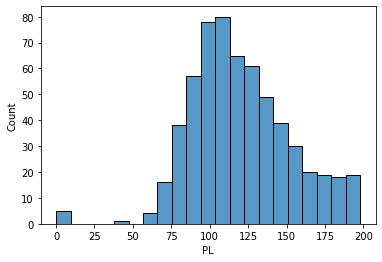

In [56]:
sns.histplot(x='PL', data=train_dt)

<AxesSubplot:xlabel='PL', ylabel='Count'>

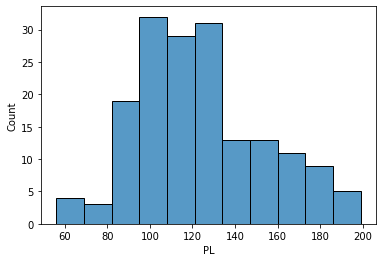

In [57]:
sns.histplot(x='PL', data=test_dt)

In [58]:
null_train_pl= train_dt['PL'].isna().sum()
null_test_pl= test_dt['PL'].isna().sum()

print('Train dataset PL sum of null values {}'.format(null_train_pl))
print('Test dataset PL sum of null values {}'.format(null_test_pl))

Train dataset PL sum of null values 0
Test dataset PL sum of null values 0


<AxesSubplot:xlabel='PL'>

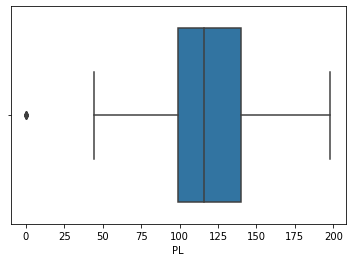

In [59]:
sns.boxplot(x='PL',data=train_dt)

<AxesSubplot:xlabel='PL'>

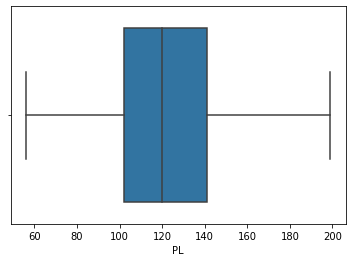

In [60]:
sns.boxplot(x='PL',data=test_dt)

* Only in training dataset have records with value of 0. In this case, these records can be treated as error data, therefore I will replace this one with mean value of the column for better training process

In [61]:
# Check for null values
print("Sum of records with value of 0 in train dataset is {}".format(train_dt[train_dt['PL']==0].shape[0]))
print("Sum of records with value of 0 is test dataset {}".format(test_dt[test_dt['PL']==0].shape[0]))

Sum of records with value of 0 in train dataset is 5
Sum of records with value of 0 is test dataset 0


In [62]:
train_dt['PL'] = train_dt['PL'].replace(0,train_dt['PL'].mean())
test_dt['PL'] = test_dt['PL'].replace(0,test_dt['PL'].mean())

In [63]:
print(train_dt['PL'].shape)
print(test_dt['PL'].shape)

(599,)
(169,)


### SK

<AxesSubplot:xlabel='SK'>

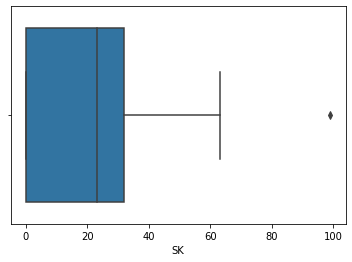

In [64]:
sns.boxplot(x='SK',data=train_dt)

<AxesSubplot:xlabel='SK'>

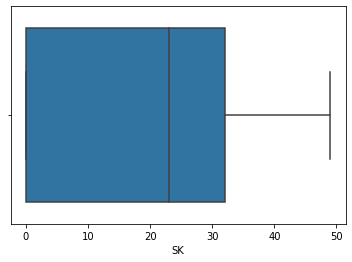

In [65]:
sns.boxplot(x='SK',data=test_dt)

* Only the training dataset have one record with SK value > 70. This one can be seen as outlier ->  must be deleted for better training process

In [66]:
null_train_sk= train_dt['SK'].isna().sum()
null_test_sk= test_dt['SK'].isna().sum()

print('Train dataset SK sum of null values {}'.format(null_train_sk))
print('Test dataset SK sum of null values {}'.format(null_test_sk))

Train dataset SK sum of null values 0
Test dataset SK sum of null values 0


In [67]:
train_dt[train_dt['SK']>70]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
579,2,197.0,70.0,99,0,34.7,0.575,62,Positive


In [68]:
test_dt[test_dt['SK']>70]

,PRG,PL,PR,SK,TS,M11,BD2,Age


In [69]:
#Remove outlier from both training and testing datasets
train_dt = train_dt[train_dt['SK']<70]
test_dt = test_dt[test_dt['SK']<70]

In [70]:
#Double check
train_dt[train_dt['SK']>70]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis


### TS

<AxesSubplot:xlabel='TS'>

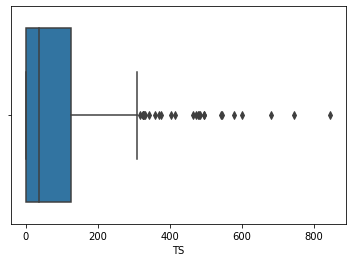

In [71]:
sns.boxplot(x='TS',data=train_dt)

<AxesSubplot:xlabel='TS'>

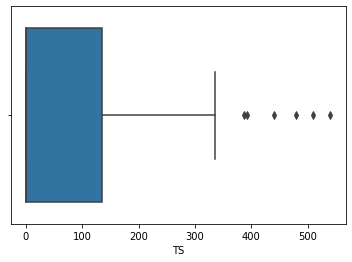

In [72]:
sns.boxplot(x='TS',data=test_dt)


*  Many records contain far more values than the normal value range.However, since the number of rows in the dataset is not large, and I haven't had any insight about which medical type this record represents, Therefore, I will keep these values as they are.


In [73]:
#Check for null value
null_train_ts= train_dt['TS'].isna().sum()
null_test_ts= test_dt['TS'].isna().sum()

print('Train dataset TS sum of null values {}'.format(null_train_ts))
print('Test dataset TS sum of null values {}'.format(null_test_ts))

Train dataset TS sum of null values 0
Test dataset TS sum of null values 0


<AxesSubplot:xlabel='TS', ylabel='Count'>

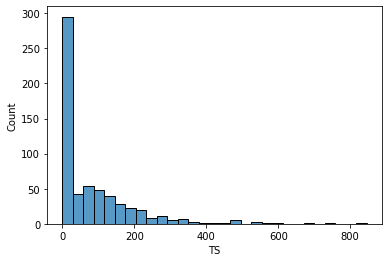

In [74]:
sns.histplot(x='TS', data=train_dt)

<AxesSubplot:xlabel='TS', ylabel='Count'>

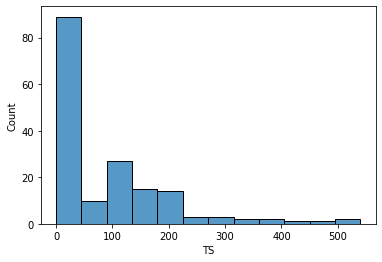

In [75]:
sns.histplot(x='TS', data=test_dt)

In [76]:
print(train_dt['TS'].shape)
print(test_dt['TS'].shape)

(598,)
(169,)


### M11 (Body mass index (weight in kg/(height in m)^2)

<AxesSubplot:xlabel='M11', ylabel='Count'>

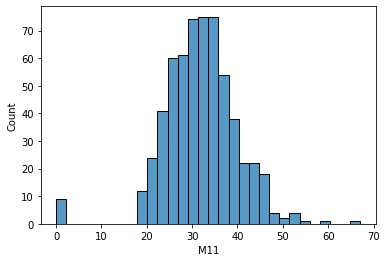

In [77]:
sns.histplot(x='M11',data=train_dt)

<AxesSubplot:xlabel='M11', ylabel='Count'>

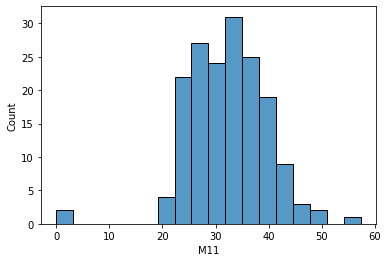

In [78]:
sns.histplot(x='M11',data=test_dt)

<AxesSubplot:xlabel='M11'>

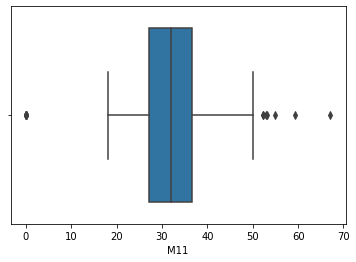

In [79]:
sns.boxplot(x='M11',data=train_dt)

<AxesSubplot:xlabel='M11'>

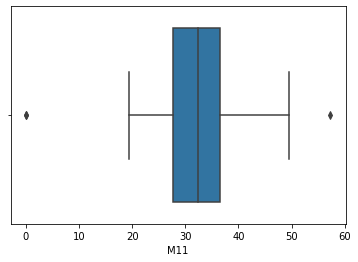

In [80]:
sns.boxplot(x='M11',data=test_dt)

* In both datasets, there are records with a value of 0 for body mass index value. According to [], this only happens when people... Therefore, as a normal condition, those records can be seen as probably impossible values. I will replace these values with the mean of the column for both datasets.



In [81]:
#Check for null values first before performing any data cleaning and transforming
null_train_m11= train_dt['M11'].isna().sum()
null_test_m11= test_dt['M11'].isna().sum()

print('Train dataset M11 sum of null values {}'.format(null_train_m11))
print('Test dataset M11 sum of null values {}'.format(null_test_m11))

Train dataset M11 sum of null values 0
Test dataset M11 sum of null values 0


In [82]:
print(train_dt['M11'].shape)
print(test_dt['M11'].shape)

(598,)
(169,)


In [83]:
train_dt[train_dt['M11']==0]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
9,8,125.0,96.000000,0,0,0.0,0.232,54,Positive
49,7,105.0,68.732888,0,0,0.0,0.305,24,Negative
60,2,84.0,68.732888,0,0,0.0,0.304,21,Negative
81,2,74.0,68.732888,0,0,0.0,0.102,22,Negative
145,0,102.0,75.000000,23,0,0.0,0.572,21,Negative
371,0,118.0,64.000000,23,89,0.0,1.731,21,Negative
426,0,94.0,68.732888,0,0,0.0,0.256,25,Negative
494,3,80.0,68.732888,0,0,0.0,0.174,22,Negative
522,6,114.0,68.732888,0,0,0.0,0.189,26,Negative


In [84]:
test_dt[test_dt['M11']==0]

,PRG,PL,PR,SK,TS,M11,BD2,Age
85,5,136,82.000000,0,0,0.0,0.640,69
107,10,115,70.426036,0,0,0.0,0.261,30


In [85]:
train_dt['M11']=train_dt['M11'].replace(0,train_dt['M11'].mean())
test_dt['M11']=test_dt['M11'].replace(0,test_dt['M11'].mean())


### BD2 [Blood Work Result-4 (mu U/ml)]                                    

<AxesSubplot:xlabel='BD2', ylabel='Count'>

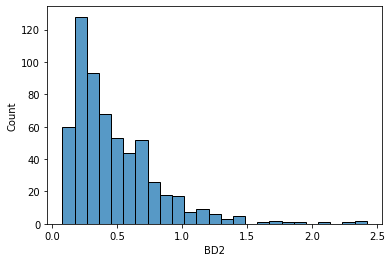

In [86]:
sns.histplot(x='BD2', data=train_dt)

<AxesSubplot:xlabel='BD2', ylabel='Count'>

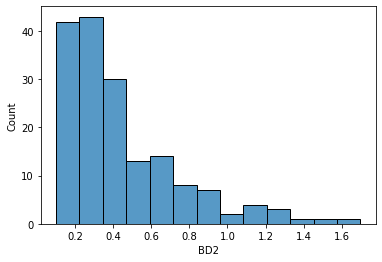

In [87]:
sns.histplot(x='BD2', data=test_dt)

<AxesSubplot:xlabel='BD2'>

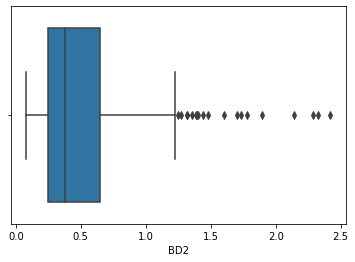

In [88]:
sns.boxplot(x='BD2',data=train_dt)

<AxesSubplot:xlabel='BD2'>

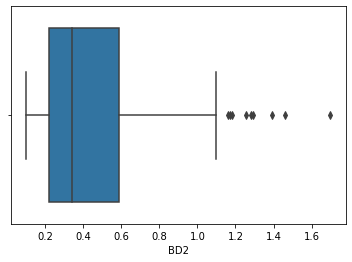

In [89]:
sns.boxplot(x='BD2',data=test_dt)

In [90]:
null_train_bd2= train_dt['BD2'].isna().sum()
null_test_bd2= test_dt['BD2'].isna().sum()

print('Train dataset BD2 sum of null values {}'.format(null_train_bd2))
print('Test dataset BD2 sum of null values {}'.format(null_test_bd2))

Train dataset BD2 sum of null values 0
Test dataset BD2 sum of null values 0



Many records contain far more values than the normal value range.However, since the number of rows in the dataset is not large, and I haven't had any insight about which medical type this record represents, Therefore, I will keep these values as they are.

## Explore Target column - Sepssis
##### Here I will analyse about the target column - `Sepssis`

* I will convert the value of Sepssis to number before the training process in order to make the binary classification learning process be easier

In [91]:
def convert_binary(x):
    if x == 'Positive':
        return 1
    else:
        return 0
train_dt['Sepssis'] = train_dt['Sepssis'].apply(convert_binary)

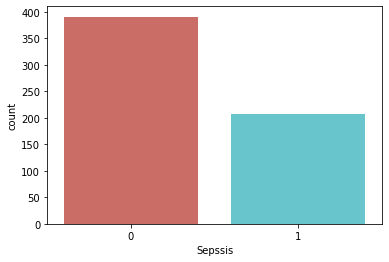

In [92]:
sns.countplot(x="Sepssis", data=train_dt, palette="hls")
plt.show()

In [93]:
print(train_dt['Sepssis'].value_counts())

number_with_sepssis = len(train_dt[train_dt['Sepssis']==1])
number_no_sepssis = len(train_dt[train_dt['Sepssis']==0])
percentage_of_sepssis = number_with_sepssis/(number_with_sepssis+number_no_sepssis)
percentage_of_nosepssis = number_no_sepssis/(number_with_sepssis+number_no_sepssis)
ratio = percentage_of_nosepssis/percentage_of_sepssis
print("Percentage of people in ICU develop Sepssis: %.3f"%(percentage_of_sepssis*100))
print("Percentage of people in ICU NOT develop Sepssis: %.3f"%(percentage_of_nosepssis*100))
print("Ratio of people develop sepssis / people did not develop sepssis: %.3f"%(ratio))



0    391
1    207
Name: Sepssis, dtype: int64
Percentage of people in ICU develop Sepssis: 34.615
Percentage of people in ICU NOT develop Sepssis: 65.385
Ratio of people develop sepssis / people did not develop sepssis: 1.889


As can be seen, our data sets are not balanced. From above values, we can see that the ratio between the patient will develop sepssis during ICU stay (class 0) over people did not develop sepssis is approximately 2 times (~ 1.9)
-> This imbalance will lead to the high probability that this dataset will perform well on detecting people without developing sepssis  compared to the people will develop sepssis. This dataset is right-skewed to the Negative (or 0) in the diagram

#### Why balanced the dataset

* Normally when dealing with imbalanced dataset, depending on the purpose of what we are going to predict, that people decide to balance or not balance the dataset. One of the most popular techniques to balance the dataset is resampling. Since the imbalanced dataset might have some impact on the accuracy of the machine learning model. The accuracy will be bias towards the assertive dataset. In this case, the model will be good at predict patient won't develop Sepssis.  

* In our case, ***this bias is not encourage and might cause death for patient if predict wrongly***.  Since `Sepssis` is a life-threatening medical emergency, I don't want the model to bias towards 'Negative' class -> It it better to predict patient in ICU will not develop a sepsis to have sepssis, rather than predict patient potentially develop sepssis to not have a sepssis - doctor will ignore them, consequently resulting in death for patient. 

## Relationship between Age, Sepssis and other features

<AxesSubplot:xlabel='PRG', ylabel='Age'>

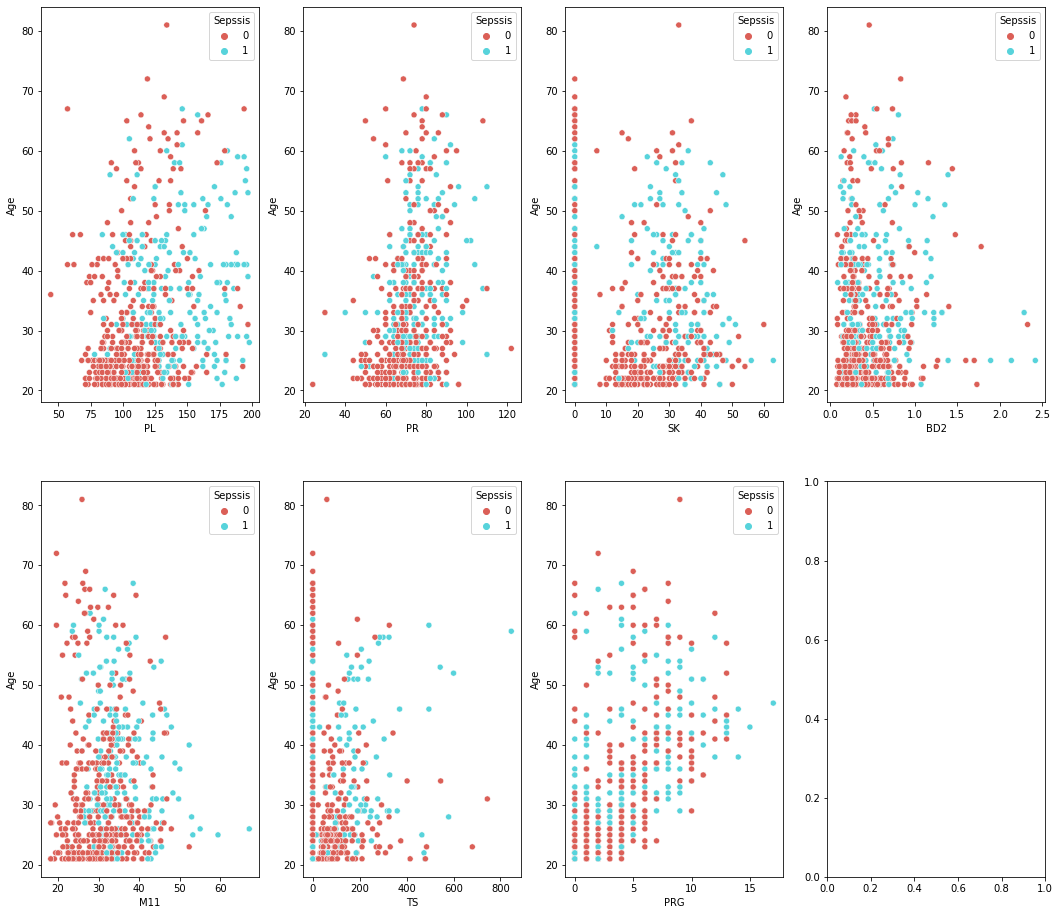

In [94]:
# sns.scatterplot(x='PL',y='Age',data=train_dt,hue="Sepssis")
fig, axes = plt.subplots(nrows =2,ncols=4, figsize=(18, 16))

sns.scatterplot(x='PL',y= 'Age',data=train_dt, ax=axes[0,0], hue= 'Sepssis',palette="hls")
sns.scatterplot(x='PR',y='Age',data=train_dt,ax=axes[0,1],hue="Sepssis",palette="hls")
sns.scatterplot(x='SK',y='Age',data=train_dt,ax=axes[0,2],hue="Sepssis",palette="hls")
sns.scatterplot(x='BD2',y='Age',data=train_dt,ax=axes[0,3],hue="Sepssis",palette="hls")
sns.scatterplot(x='M11',y='Age',data=train_dt,ax=axes[1,0],hue="Sepssis",palette="hls")
sns.scatterplot(x='TS',y='Age',data=train_dt,hue="Sepssis",ax=axes[1,1],palette="hls")
sns.scatterplot(x='PRG',y='Age',data=train_dt,hue="Sepssis",ax=axes[1,2],palette="hls")

In [95]:
target_col = ['Sepssis']
features = train_dt.columns.tolist()[:-1]
features

['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

<AxesSubplot:xlabel='Sepssis', ylabel='BD2'>

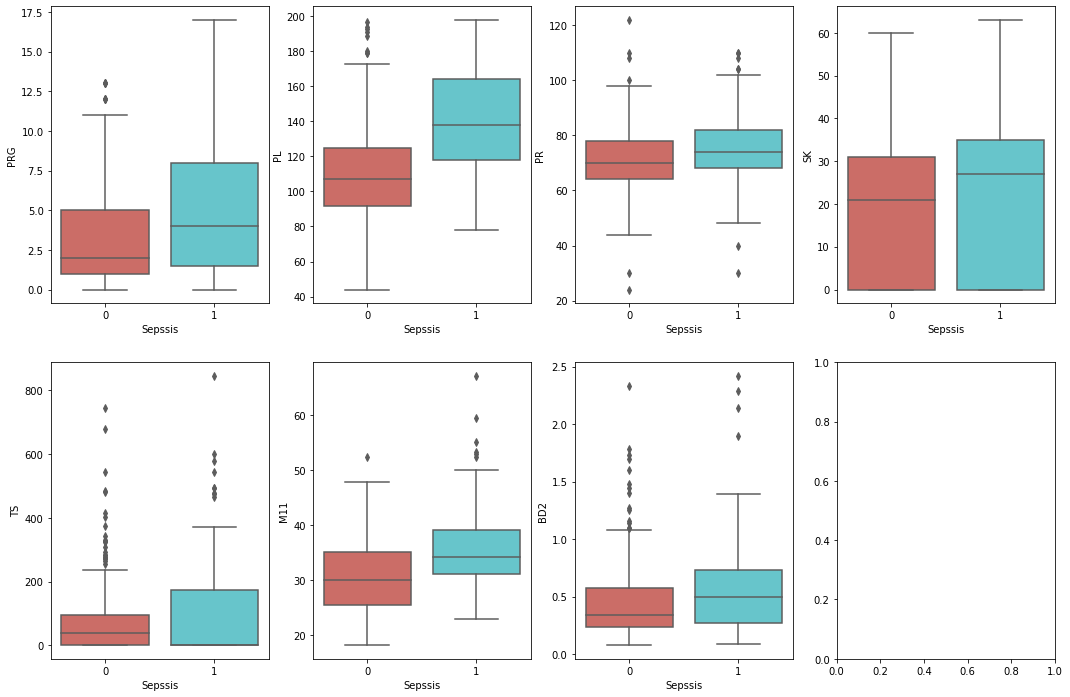

In [96]:
# for fea in features:
#     sns.boxplot(x='Sepssis',y=fea,data=train_dt)
#     plt.show()
fig, axes = plt.subplots(nrows =2,ncols=4, figsize = (18,12) )
sns.boxplot(x='Sepssis', y =features[0],data=train_dt, ax=axes[0,0],palette="hls")
sns.boxplot(x='Sepssis', y =features[1],data=train_dt, ax=axes[0,1],palette="hls")
sns.boxplot(x='Sepssis', y =features[2],data=train_dt, ax=axes[0,2],palette="hls")
sns.boxplot(x='Sepssis', y =features[3],data=train_dt, ax=axes[0,3],palette="hls")
sns.boxplot(x='Sepssis', y =features[4],data=train_dt, ax=axes[1,0],palette="hls")
sns.boxplot(x='Sepssis', y =features[5],data=train_dt, ax=axes[1,1],palette="hls")
sns.boxplot(x='Sepssis', y =features[6],data=train_dt, ax=axes[1,2],palette="hls")

***Initial insight***

[`PL`]
* Patient who age from 20 to 30 and `PL` values that ***< 125*** might not likely to develop a sepssis. 

* Patient who age less than 40 and `PL` values that ***>125** could potentially develop a sepssis. 

* Overall, there is a clear distinction between the one who develop a sepssis and whom none in features `PL`. Patient with `PL` value <120 are less likely to develop a sepssis

[`PR`]
* Patients who age from 20 to nearly 25 and have a `PR (blood pressure)` of approximately  ***<70*** might not be likely to develop sepsis.

[`SK`]
* Patient who age from 20 to nearly 27 and have a `SK` value of approximately ***<30*** might not be likely to develop sepssis 
* Patient who age from 48 to nearly 60 and have a `SK` value of approximately ***~20 - 30*** have slight potential to develop sepssis.

[`BD2`]
* Patient who age from 20 to nearly 28 and have a `BD2` value of approximately ***<0.4*** might not be likely to develop sepssis 
* Patient who age 30 -> ~50  and have a `BD2` value of approximately ***>1.0 - 1.5*** might slightly to develop sepssis.

[`M11`]
* Patient who age from 20 to nearly 27 and have a `M11` value of approximately ***<40*** might not be likely to develop sepssis.
Overall, there is a quite clear distinction between the one who develop a sepssis and whom none in features `M11`. Patient with higher `M11` value have potential to develop sepssis. 

[`TS` and `PRG`]
The scatterplot did not show any significant difference between patient will or will not develop a sepssi in ICU 

### Correlation Matrix

<AxesSubplot:>

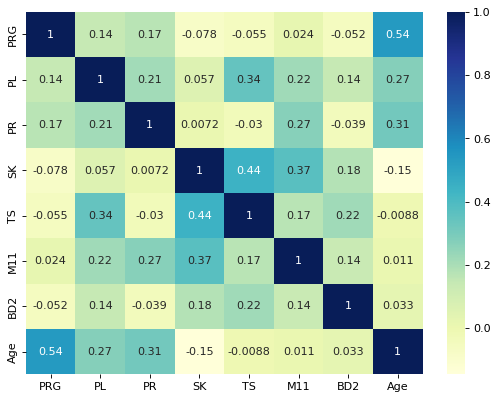

In [97]:
# Check correlation
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
corr=train_dt[features].corr()
sns.heatmap(corr,cmap="YlGnBu",annot = True)

As can be observed from above correlation graph, the features in the dataset do not depend too much to each other. The highest correlation is just 0.54.
* `Age` has quite moderate correlation with `PRG` at 0.54 percentage. 
* `TS` and `SK` gets correlation of 0.44. 
* `PL` and `TS` has correlation of 0.34. 
However, these correlation numbers could not provide any specific insight, expect from the dataset do not relate too much on each other.
<br>
-> Hence, we are ready to fit the data to machine learning models

# Approaches

# Import Statement for Models

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier as rbf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,make_scorer,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier as rbf
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split


# Split train and test set

In [99]:
X = train_dt[features]
Y = train_dt[target_col]

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=1,
                                                   stratify=Y)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(448, 8)
(150, 8)
(448, 1)
(150, 1)


In [102]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values

# Set up evaluation metric

In [104]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold

def evaluation(estimator,X_test, Y_test, X_train,Y_train):
	
	pred_train=estimator.predict(X_train)
	pred_test = estimator.predict(X_test)

	# Accuracy, Precision and Recall
	score_test_1 = accuracy_score(Y_test,pred_test)*100
	score_test_2 = precision_score(Y_test,pred_test)*100
	score_test_3= recall_score(Y_test,pred_test)*100
	score_test_4 = f1_score(Y_test,pred_test)*100
	score_test_5 = roc_auc_score(Y_test, pred_test)*100
	score_test_6 = mean_absolute_error(Y_test,pred_test)
	score_test_7 = mean_squared_error(Y_test,pred_test)


	score_train_1 = accuracy_score(Y_train,pred_train)*100
	score_train_2 = precision_score(Y_train,pred_train)*100
	score_train_3= recall_score(Y_train,pred_train)*100
	score_train_4 = f1_score(Y_train,pred_train)*100
	score_train_5 = roc_auc_score(Y_train, pred_train)*100
	score_train_6 = mean_absolute_error(Y_train,pred_train)
	score_train_7 = mean_squared_error(Y_train,pred_train)

	print("\n")
	print("------------ Evaluation metrics --------------")
	print('Accuracy  | Test: %.3f, Train: %.3f, Difference: %.3f' % (score_test_1,score_train_1, score_train_1-score_test_1))
	print('Precision  | Test: %.3f, Train: %.3f, Difference: %.3f' % (score_test_2,score_train_2,score_train_2-score_test_2))
	print('Recall       | Test: %.3f, Train: %.3f, Difference: %.3f' % (score_test_3,score_train_3,score_train_3-score_test_3))
	print('F1 score   | Test: %.3f, Train: %.3f, Difference: %.3f'% (score_test_4,score_train_4,score_train_4-score_test_4))
	print('ROC - AUC   | Test: %.3f, Train: %.3f, Difference: %.3f'% (score_test_5,score_train_5,score_train_5-score_test_5))
	print('MAE         | Test: %.3f, Train: %.3f, (Test - Train) : %.3f'% (score_test_6,score_train_6,score_test_6-score_train_6))
	print('MSE         | Test: %.3f, Train: %.3f, (Test - Train) : %.3f'% (score_test_7,score_train_7,score_test_7-score_train_7))


	print("------------ Classification Report --------------")
	print(classification_report(Y_test, pred_test))
	print("------------ Confusion Matrix --------------")
	# Making the Confusion Matrix
	cm = confusion_matrix(Y_test, pred_test)
	print ("Confusion Matrix:\n",cm)
	group_name = ['TP','FP','FN','TN']
	group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
	group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
	labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_name,group_counts,group_percentages)]
	labels = np.array(labels).reshape(2,2)
	sns.heatmap(cm,annot = labels, fmt ="",cmap='Greens')


## Decision Tree
***Why Decision Tree***
* The decision tree receives knowledge in the form of a tree, which can alternatively be represented as a set of discrete rules to make it easier to understand. The key advantage of the decision tree classifier is its flexibility in utilizing multiple feature subsets and decision criteria at various stages of classification. Additionaly, a Decision Tree model is simple to build and does not involve extensive data preparation, normalization, or scaling. 

***Notice when using Decision Tree*** 

* The tree is inconsistent when a slight change in the tree's structure results in a substantial change in the structure, resulting in a high variance. 
* The tree's algorithms works in top-down manner, directing them from the tree's root to a leaf, based on the results of tests conducted along the journeyare. Therefore this algorithm will search to the deepest section of the tree for the leaf, resulting in increasing complexity of the tree might highly cause to overfitting problem if not justified.

### Model 1: Base Model Default Decision Tree


In [105]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=50, class_weight='balanced')
dtc = dtc.fit(X_train, Y_train)

***Model Evaluation***



------------ Evaluation metrics --------------
Accuracy  | Test: 65.333, Train: 100.000, Difference: 34.667
Precision  | Test: 50.000, Train: 100.000, Difference: 50.000
Recall       | Test: 50.000, Train: 100.000, Difference: 50.000
F1 score   | Test: 50.000, Train: 100.000, Difference: 50.000
ROC - AUC   | Test: 61.735, Train: 100.000, Difference: 38.265
MAE         | Test: 0.347, Train: 0.000, (Test - Train) : 0.347
MSE         | Test: 0.347, Train: 0.000, (Test - Train) : 0.347
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        98
           1       0.50      0.50      0.50        52

    accuracy                           0.65       150
   macro avg       0.62      0.62      0.62       150
weighted avg       0.65      0.65      0.65       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[72 26]
 [26 26]]


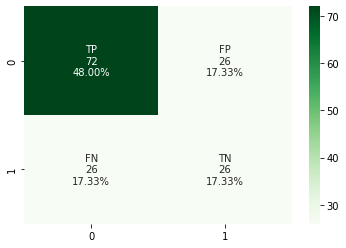

In [106]:
evaluation(dtc,X_test,Y_test,X_train,Y_train)

* As mentioned above, the result show that the Decision Tree Algorithm work perfectly with the training data with accuracy of 100%, however when it is applied to predict on unseen data. The model shown poor result in all metrics. 
* With accuracy of 65% on testing set compared to 100% in training set. This model is overfitting the issue. In testing data it performed pretty bad - although in binary classification accuracy does not mean anything, the accuracy gap between testing and training datasets should not be too big.  
* When we look at other scores which are: F1 (50%), Precision(50%) and recall(50%) on the testing data are around 50% which equal to the probability of a flip of a coin (50-50). This is extremely useless and dangerous for classification problem in health care, especially with Sepssis - life-threatening issue. Looking at the cofusion matrix, we can see that it predicts correctly 69 patient who do not develop sepssis. However, among the remain rate, it could not predict many people with sepsiss and will develop sepssis (True Negative). Additionally, patients who had sepssis is but is predicted to not develop sepssis is considerably high with 26 people. In conclusion, it’s slightly good at finding patient without a sepssis, but terrible at finding patient who is potentially develop sepssis. 

-> We should use hyperparameter tuning to reduce this overfitting issue. 

### Model 2: Decision Tree Classifier Hyperparameter Tuning
***Why Random CV - Hyperparam tuning***

* Due to the high variation of the decision tree model, the overfitting problem is likely to occur. GridSearchCV will attempt to discover the ideal parameter that will mitigate this overfitting problem and hence lower the model's variance. KFold will be responsible for selecting one set from each of the n training sets for parameter adjustment. The parameters in this case are the tree's length, min_samples_split, min_weight_fraction_leaf, max_leaf_nodes, max_features('auto','sqrt','log2') and the criterion used to define the tree's split: gini or entropy.

In [113]:
from sklearn.tree import DecisionTreeClassifier as DTC
# pipe_dtc = Pipeline(['clf', DecisionTreeClassifier(random_state =1)])
pipe_dtc = imbpipeline(steps = [
                                ['decisiontreeclassifier', DTC()]])
dtc_param_grid = {

    'decisiontreeclassifier__criterion':['gini','entropy'],
    'decisiontreeclassifier__max_features': ['auto','sqrt','log2', None],
    'decisiontreeclassifier__max_depth': np.arange(1,200,2),
    'decisiontreeclassifier__min_weight_fraction_leaf': np.arange(0,2,0.01),
    'decisiontreeclassifier__min_samples_split':np.arange(1,100,1),
	'decisiontreeclassifier__max_leaf_nodes': np.arange(1,50,5)

	# 'decisiontreeclassifier__ccp_alpha':np.logspace(-5,5,10)
    
}
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=1)
# Perform RandomizedSearchCV
randomized_search_dtc = RandomizedSearchCV(estimator=pipe_dtc,param_distributions=dtc_param_grid,n_iter=50,scoring=make_scorer(f1_score),verbose=0,cv=stratified_kfold, n_jobs=2)
randomized_search_dtc.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Vers

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[['decisiontreeclassifier',
                                              DecisionTreeClassifier()]]),
                   n_iter=50, n_jobs=2,
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39...
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86

In [114]:
print('Average F1 score of best param:%.3f'%(randomized_search_dtc.best_score_))
print('Best parameter using %s'%(randomized_search_dtc.best_params_))

Average F1 score of best param:0.625
Best parameter using {'decisiontreeclassifier__min_weight_fraction_leaf': 0.31, 'decisiontreeclassifier__min_samples_split': 28, 'decisiontreeclassifier__max_leaf_nodes': 6, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__max_depth': 127, 'decisiontreeclassifier__criterion': 'entropy'}


***Model Evaluation***



------------ Evaluation metrics --------------
Accuracy  | Test: 66.000, Train: 71.652, Difference: 5.652
Precision  | Test: 50.746, Train: 56.863, Difference: 6.116
Recall       | Test: 65.385, Train: 74.839, Difference: 9.454
F1 score   | Test: 57.143, Train: 64.624, Difference: 7.481
ROC - AUC   | Test: 65.856, Train: 72.402, Difference: 6.547
MAE         | Test: 0.340, Train: 0.283, (Test - Train) : 0.057
MSE         | Test: 0.340, Train: 0.283, (Test - Train) : 0.057
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.78      0.66      0.72        98
           1       0.51      0.65      0.57        52

    accuracy                           0.66       150
   macro avg       0.65      0.66      0.64       150
weighted avg       0.69      0.66      0.67       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[65 33]
 [18 34]]


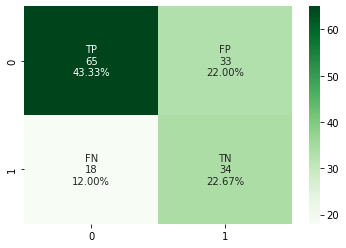

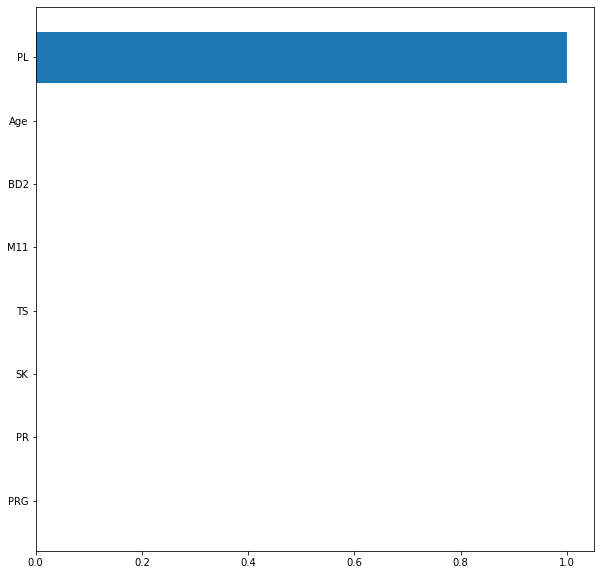

In [109]:
dtc_hyper = DTC(max_depth=3,criterion= 'entropy',min_weight_fraction_leaf=0.43,min_samples_split=44,max_leaf_nodes=36)
dtc_hyper.fit(X_train,Y_train)
dtc_pred=dtc_hyper.predict(X_test)
# random_forest_hyper = rbf(max_depth=192, n_estimators=148,criterion= 'gini',min_weight_fraction_leaf=0.0,max_features='auto',min_samples_split=7)
# random_forest_hyper.fit(X_train,Y_train)
evaluation(dtc_hyper,X_test,Y_test,X_train,Y_train)
tree_feature_importances = dtc_hyper.feature_importances_
sorted_idx = tree_feature_importances.argsort()
plt.figure(figsize=(10,10))
plt.barh(train_dt.columns[sorted_idx], tree_feature_importances[sorted_idx])
plt.show()


* The model does not overfit now, however the performance of accuracy on both dataset is not very high with 65% in testing dataset and 69% in the training set. However, accuracy is not all as we see the model performs slightly better on recall and F1. 
* As can be seen from the classification report table, the precision score (50%) and the recall(65%) score are just above average when the model predicts the patient will develop a sepssis in ICU. Resulting in, the f1-score for this class 1 is low as the dataset is right-skewed. On the other hand, the precision for class 0 (0.78) and the recall score (0.66) are higher which leads to the higher value in f1-score for class 0 is 0.72. This means that this Decision tree model does a better job on recognize the fraction of true positive predictions from all positive records in dataset - patients who would not develop sepssis and are predicted as not develop sepssis. 

* Since patient who have high potential of developing sepssis is important, this reduction can be seen as a slightly good rate since it minimizes the number of patients that would have dead because of wrong prediction. However, looking in detail in confusion matrix, the precision score is just meet the average. 

* Precision = 0.5 means that treating 10 patients who are predicted to develop sepssis - label “Positive”, in half of the cases we’ll find patients who do not likely to develop sepssis. Therefore, we must looking at the precision score also to evaluate this model. Although it might not lead to life-threatening situation, the model does not suitable for ICU as it might lead the hospital to overload situation. 

* Despite the fact that we care more about False Negative than False Positive, with the current rate, the hospital can be overlwhelmed in terms of accommodation and staff needed to take care these patients. As when we predict that patient will develop sepssis in ICU, there is a must to apply special treatment to those patient, however it is somehow a redundancy if we are not carefully consider the number of patients who would likely to receive these treatments. There are many other disease that needed to be take cared in the hospital. 

* In conclusion, although the Cross Validation in Decision Tree reduce the chance of overfitting and shows significant improvement on recall. This model is not an optimal solution to our problem

It seems that Decision Forest is not a good algorithm for our problem. So we will move to other algorithms - which is also an improvement of Decision Tree in the next section - Random Forest algorithms





## Random Forest 

***Why Random Forest***

* Since the Decision Tree algorithm will result in same tree on same dataset despite how many times we run it. Therefore, a new ensemble technique called random forests is applied to inject some randomness. Random Forest Consider that each of the ensemble's classifiers is a decision tree classifier, and the ensemble as a whole is a "forest." Individual decision trees are built by determining the split using a random selection of attributes at each node. In more technical terms, each tree is dependent on the values of a random vector sampled separately and uniformly across the forest. Each tree votes during classification, and the most popular class is returned.

* As with the decision tree, missing data, scaling data, and normalizing data have no effect on the random forest's performance. 

* One of the most significant benefits of random forest is its adaptability. It may be used for both regression and classification problems, and the relative priority it assigns to the input features is easily visible. 

* Additionally, Random Forest can make us avoid the biggest problem of machine learning which is overfitting. If the forest contains a sufficient number of trees, the classifier will avoid overfitting the model.

* On the other hand, because it is a collection of numerous decision trees, the random forest's complexity is very complicated. The prediction time is quite lengthy and costly. 

### Model 3: Random Forrest Hyperparameter Tuning 
***Why hyperparameter tuning random forest***

* To address the aforementioned issue of the random forest being time consuming and unnecessarily complicated, it is critical to examine the proper number of trees. RandomSearchCV plays a part in determining the best number of trees that fits the model as well as the other parameters.

* There are 3 most important parameters that needed to be accessed in the param grid including max_depth, n_estimators, and min_samples_split. 

*   n_estimators hyperparameter - specifies the number of trees the algorithm constructs prior to doing maximum voting or averaging predictions. Resulting in increasing the number of trees improves performance and makes forecasts more stable.

*   max_features, which specifies the maximum amount of features considered by random forest when splitting a node.

*   min sample leaf. This specifies the smallest number of leafs necessary to separate an internal node.


In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

pipeline_rf = imbpipeline(steps = [
                                ['randomforestclassifier', rbf()]])
rf_param_grid = {

'randomforestclassifier__criterion':['gini','entropy'],
    'randomforestclassifier__max_features': ['auto','sqrt','log2'],
    'randomforestclassifier__max_depth': np.arange(1,250,1),
    'randomforestclassifier__n_estimators': np.arange(1,200,5),
    'randomforestclassifier__min_weight_fraction_leaf': np.arange(0,5,0.05),
    'randomforestclassifier__min_samples_split':np.arange(1,50,1)
    
}
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=1)

# Perform RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(estimator=pipeline_rf,param_distributions=rf_param_grid,n_iter=100,scoring=make_scorer(f1_score),verbose=0,cv=7, n_jobs=-1)
randomized_search_rf.fit(X_train,Y_train)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/imblearn/pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/imblearn/pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/imblearn/pipeline.py:272: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versio

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[['randomforestclassifier',
                                              RandomForestClassifier()]]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  3...
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95]),
                                        'randomforestclassifier__n_estimators': ar

In [ ]:
print('Average F1 score of best param:%.3f'%(randomized_search_rf.best_score_))
print('Best parameter using %s'%(randomized_search_rf.best_params_))

Average F1 score of best param:0.646
Best parameter using {'randomforestclassifier__n_estimators': 96, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__min_samples_split': 15, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 213, 'randomforestclassifier__criterion': 'entropy'}


/var/folders/qs/m5w6bzsn1fz5jfs1rq4ccsv40000gn/T/ipykernel_49224/2352307916.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_hyper.fit(X_train,Y_train)




------------ Evaluation metrics --------------
Accuracy  | Test: 70.667, Train: 91.741, Difference: 21.074
Precision  | Test: 61.111, Train: 93.382, Difference: 32.271
Recall       | Test: 42.308, Train: 81.935, Difference: 39.628
F1 score   | Test: 50.000, Train: 87.285, Difference: 37.285
ROC - AUC   | Test: 64.011, Train: 89.432, Difference: 25.421
MAE         | Test: 0.293, Train: 0.083, (Test - Train) : 0.211
MSE         | Test: 0.293, Train: 0.083, (Test - Train) : 0.211
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        98
           1       0.61      0.42      0.50        52

    accuracy                           0.71       150
   macro avg       0.67      0.64      0.65       150
weighted avg       0.69      0.71      0.69       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[84 14]
 [30 22]]


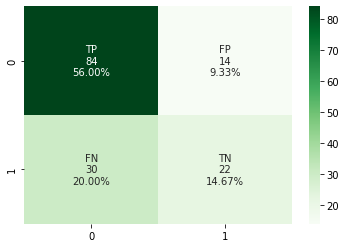

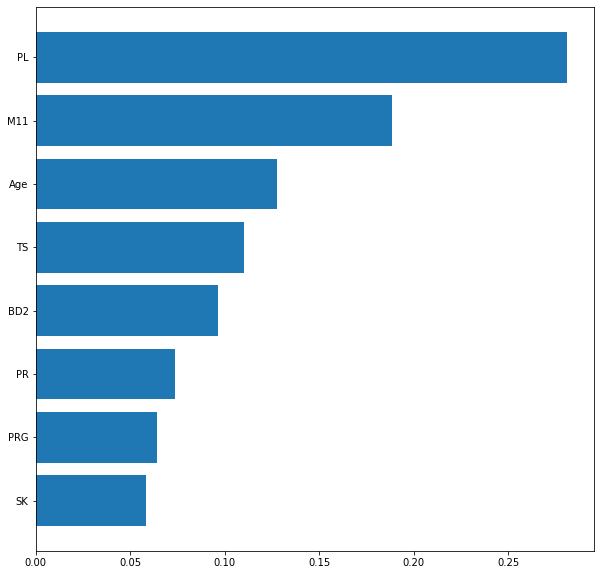

In [ ]:
random_forest_hyper = rbf(max_depth=213, n_estimators=96,criterion= 'gini',min_weight_fraction_leaf=0.0,max_features='sqrt',min_samples_split=15)

random_forest_hyper.fit(X_train,Y_train)
rf_pred=pipeline_rf.predict(X_test)
# random_forest_hyper = rbf(max_depth=192, n_estimators=148,criterion= 'gini',min_weight_fraction_leaf=0.0,max_features='auto',min_samples_split=7)
# random_forest_hyper.fit(X_train,Y_train)
evaluation(random_forest_hyper,X_test,Y_test,X_train,Y_train)
tree_feature_importances = random_forest_hyper.feature_importances_
sorted_idx = tree_feature_importances.argsort()
plt.figure(figsize=(10,10))
plt.barh(train_dt.columns[sorted_idx], tree_feature_importances[sorted_idx])
plt.show()

* From the classification report table, the result shows better score in all metrics. The recall metric is considerably high for class 0 with 0.83. This can be said that the higher the value of the recall is , the better the model at classifying patient without sepssis, but it can’t say anything about how many times we had to actually rechecked with patient who actually have a sepssis throughout these searches. The precision score is acceptable in the class 0 with 0.74. This high rate is caused due to the imbalanced dataset (with more 0 labels). 

* On the other hand, recall for class 1 is only 0.42, which is below average. As the rate of False Negative is 20% - 30 patients are predicted not to develop sepssis when they actually are. We can tell from precision score of 0.61 in class 1 means that half of patient labelled with sepssis, we will find patient would not develop sepssis. Additionally, recall equal to 0.42 can tell that there is a very low chance to detect patient with sepssis. This seems to not helpful in predicting if a patient will develop sepsis in the period of their stay in the ICU. This rate is a not suitable for medical prediction, again especially for extremely dangerous infection.   

* Also, in term of machine learning problem, the model is overfit as it perform quite well in the training set but not really good when they acted on unseen data. The gap in all metric (excluding MAE and MSE) are very high, this can tell that the model is not generalized enough. 

## Logistic Regression
***Why Logistic Regression***
* Logistic Regression is a machine learning classification technique. It models the dependent variable using a logistic function. The dependent variable is binary in nature, implying that there are only two possible classifications . As a result, this algorithm is effective for binary classification. 

* Logistic regression is simpler to implement, analyze, and train than linear regression. 

* It is extremely efficient in classifying unclassified records.

* It can interpret model coefficients as indicators of the significance of particular features.

* Above all of reasons, it is a good fit for our problem as we only classify the target column with 2 values - if a given in ICU would not develop a sepsis (Sepsis Negative / class 0) or will develop sepsis (Sepsis Positive / class 1) during their ICU stay”.



### Model 4: Base model Logistic Regression

In [110]:
model = LogisticRegression(random_state=1, penalty='none', 
                         max_iter=100 
                    )
lr_base=model.fit(X_train, Y_train)
is_grid = False


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




------------ Evaluation metrics --------------
Accuracy  | Test: 73.333, Train: 78.795, Difference: 5.461
Precision  | Test: 67.647, Train: 73.077, Difference: 5.430
Recall       | Test: 44.231, Train: 61.290, Difference: 17.060
F1 score   | Test: 53.488, Train: 66.667, Difference: 13.178
ROC - AUC   | Test: 66.503, Train: 74.672, Difference: 8.169
MAE         | Test: 0.267, Train: 0.212, (Test - Train) : 0.055
MSE         | Test: 0.267, Train: 0.212, (Test - Train) : 0.055
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        98
           1       0.68      0.44      0.53        52

    accuracy                           0.73       150
   macro avg       0.71      0.67      0.67       150
weighted avg       0.72      0.73      0.72       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[87 11]
 [29 23]]


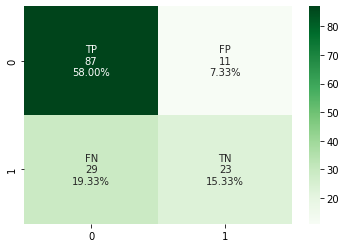

In [111]:
evaluation(lr_base,X_test,Y_test, X_train,Y_train)


* As can be seen in classification report and confusion matrix, the number of patients being clasified accurately at class 0 has an precision 0.75 which is only 0.08 higher than the number of patients being classified at class 1 with 0.68. From the precision score, the precision scores in this model is quite balanced and better than above precision score. However, it is hard to tell that whether this one is good for our purpose is to predict whether patient would or would not develop sepssis during their stay in ICU. Since precision shows quite good ability of our model to differ the “patient would develop sepssis” class from the other, but, unfortunately, it doesn't give an idea of whether we have found all the patient who would develop sepssis.

* Looking into other metrics in detail, recall score for class 0 is high at 0.89 - this will determine how many patients at class 0 being classified accurately. The model is good at detecting patients would not develop sepssis during their stay in ICU, supporting with 0.75 in precision tells that 75% of the predictions of class 0 is classified correctly. This is somehow our goal but when we look into the class 1 - the model does not perform really well. Since the ultimate goal of our problem is to mitigate both the risk of health complication and staff allocation, above model does not fulfill the first goal. The model performed below average, it failed to predict the classification of patient with positive label, the score is only 0.44 for recall. This is a very low rate to detect correctly patient with high potential to develop sepssis. Looking into the confusion matrix to gain more insight. This low score of recall on class 1 might be caused due to high percentage of False Negative, at 19.33% - this rate is unacceptable and it not meet our goal.  

* F1 score in class 0 is high - which is undoubted as F1 is the harmony of precision and recall. Therefore, the balance recall and precision is the higher f1 is. On the other hand, F1 score for classifying the patient with label 1 are pretty low - just a little bit higher than average of 0.53.  

* In conclusion, this model is good at correctly classify patient would not likely to develop sepssis but perform poorly on the other label. The False Negative rate is higher, this is the field we will need to carefully consider.

***Notice*** 

The class 0 always have higher metric's score in 3 above models as the dataset is imbalanced. I will apply resampling techniques in order to achieve better scores in predicting class 1 for below models. I believe that resampling will make model learn better the class 1

### Model 4: Logistic Regression Hyperparameter Tuning with Regularisation + SMOTE

***Why applying regularisation***

By avoiding the algorithm from overfitting the training dataset, regularization may be used to build models that generalize better to unknown data.

***Why applying SMOTE***
* SMOTE, or Synthetic Minority Oversampling Technique, is an oversampling technique, however it differs from conventional oversampling in several ways. 

* SMOTE is a data augmentation method that generates synthetic data points from the original data points. SMOTE can be thought of as a more sophisticated variant of oversampling or as a data augmentation method in its own right. The advantage of SMOTE is that you are not making duplicates, but rather slightly different synthetic data points from the original data points.

* In a conventional oversampling strategy, minority data are reproduced from the population of minority data. ***While this enhances the data set, it adds no additional information or variety to the machine learning model.***

* Most advantage that I bring SMOTE into usage is that we have the ability to adjust algorithm using SMOTE to ***decrease false negatives while boosting false positives.***

Extra: How SMOTE works: 
SMOTE generates synthetic data using a k-nearest neighbor method. SMOTE begins by selecting random data from the minority class, and then sets the data's k-nearest neighbors. The random data would then be combined with the randomly chosen k-nearest neighbour to create synthetic data.




In [112]:
pipe_lr_hyper_smote = imbpipeline([('smote', SMOTE(random_state=1, sampling_strategy='minority')), ("logis", LogisticRegression(random_state=1,max_iter=1000,tol=0.0001))])
# rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=1)
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=1)
logis_param_grid = {

 	'logis__penalty' : ['l1', 'l2','elastic-net'],
	'logis__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logis__l1_ratio':np.arange(0,1,0.005),
    'logis__C':np.arange(0,5,0.01),
'logis__class_weight':[dict,'balanced']}
grid_lr_hyper_smote = RandomizedSearchCV(pipe_lr_hyper_smote,param_distributions=logis_param_grid, cv=stratified_kfold,n_iter=100,scoring=make_scorer(f1_score)) 
grid_lr_hyper_smote.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(random_state=1,
                                                    sampling_strategy='minority')),
                                             ('logis',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=1))]),
                   n_iter=100,
                   param_distributions={'logis__C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0....
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 

In [ ]:
print('Average F1 score of best param:%.3f'%(grid_lr_hyper_smote.best_score_))
print('Best parameter using %s'%(grid_lr_hyper_smote.best_params_))


Average F1 score of best param:0.694
Best parameter using {'logis__solver': 'liblinear', 'logis__penalty': 'l2', 'logis__l1_ratio': 0.265, 'logis__class_weight': 'balanced', 'logis__C': 3.33}




------------ Evaluation metrics --------------
Accuracy  | Test: 74.667, Train: 75.893, Difference: 1.226
Precision  | Test: 62.069, Train: 63.128, Difference: 1.060
Recall       | Test: 69.231, Train: 72.903, Difference: 3.672
F1 score   | Test: 65.455, Train: 67.665, Difference: 2.210
ROC - AUC   | Test: 73.391, Train: 75.189, Difference: 1.798
MAE         | Test: 0.253, Train: 0.241, (Test - Train) : 0.012
MSE         | Test: 0.253, Train: 0.241, (Test - Train) : 0.012
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        98
           1       0.62      0.69      0.65        52

    accuracy                           0.75       150
   macro avg       0.72      0.73      0.73       150
weighted avg       0.75      0.75      0.75       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[76 22]
 [16 36]]


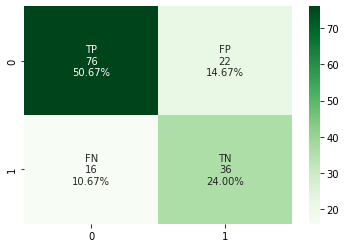

In [ ]:
lr_hyper_smote = LogisticRegression(solver='liblinear', penalty='l2', l1_ratio=0.265, class_weight='balanced', C= 3.33)
pipe_lr_hyper_smotef = imbpipeline([('smote', SMOTE(random_state=1, sampling_strategy='minority')), ("logis", LogisticRegression(random_state=1,max_iter=1000,tol=0.0001))])
pipe_lr_hyper_smotef.fit(X_train,Y_train)
evaluation(pipe_lr_hyper_smotef,X_test,Y_test, X_train,Y_train)

* The average F1_score on cross validation is 0.694 which is the highest F1_score among above F1 score.

* This seems to be a better model. However, until any further determination, we need to perform evaluation on this model. 

* It can be said that the gap between recall in class 0 and class 1 is not large only 0.08, with 0.78 and 0.69 respectively. The recall score is calculate by taking `True Positive (TP) / (True Positive (TP) + False Negative)`. This is call True Positive rate and it can tell us that how many patients at specific class being classified correctly. In this case, the recall score for class 0 is higher - with 80% of correctly that model classifies patient who would not develop sepssis -> actually not develop sepssis in their period at ICU. Also, in class 1 the model also classifies moderated number of patient who would likely to develop sepssis -> to actually have sepssis during their stay, with 68%. This rate is moderately acceptable with only the rate of False Negative reduce to only 10.67%. The number of record is 16 compared to around ~29-33 records in above model. 
* The precision score is calculated by taking `True Positive (TP)/ (True Positive + False Positive)`. In term of precision score, model has high probability of correct prediction of class 0. However, when it comes to class 1, the precision score is quite low, at 0.62 - model does not perform accurately when it predicts the class 1. This low rate can possibly be caused by the increase of False Positive and reduction of True Positive. 
* Since we cares about saving and detecting as much patient with high probability to develop sepssis as possible ( Detecting positive), the F1 score in this case can be considered the best so far. F1 score is the unit of measurement that only care about positive, and is the harmonic mean between precision and recall. Therefore, this score could not be high if either precision or recall is low. In this case, the model which classifies the patient that would not develop sepssis is well enough, with F1 score for the class 0 is 0.8. Additionally, the precision and recall scores as mentioned above is not considered low (higher than the average - at least we do not predict patient just by flipping the coin!). 
* The only limitation of this model is that the False Positive rate is still considered high. 
* F1 is 0.65 and this is not a really good score. Although me mitigate the number of patient would sepssis that incorrectly predicted, we still need to optimize the ICU's resource, since keeping these patients with low probability of sepssis will overwhelm the human resources in hospital management. We still can have better model

### Model 5: Logistic Regression Hyperparameter with Under Sampling

In [ ]:
pipeline_under = imbpipeline(steps = [
	['randomunder', RandomUnderSampler(random_state=1)],
                                ['logis', LogisticRegression(random_state=1,max_iter =500)]])

stratified_kfold = StratifiedKFold(n_splits=4,
                                       shuffle=True,
                                       random_state=1)
logis_param_grid = {
	'logis__tol': np.arange(0,1,0.0001),
    'logis__l1_ratio':np.arange(0,2,0.005),
	'logis__penalty' : ['l1', 'l2','elastic-net'],
	'logis__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logis__C':np.arange(0,10,0.005),
'logis__class_weight':[dict,'balanced']}
grid_under_lr = RandomizedSearchCV(pipeline_under,param_distributions=logis_param_grid, cv=stratified_kfold,n_iter=80,scoring=make_scorer(f1_score)) 
grid_under_lr.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[['nearmiss',
                                              RandomUnderSampler(random_state=1)],
                                             ['logis',
                                              LogisticRegression(max_iter=500,
                                                                 random_state=1)]]),
                   n_iter=80,
                   param_distributions={'logis__C': array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.985e+00, 9.990e+00,
       9.995e+00]),
                                        'logis__class_weight': [...
       1.845, 1.85 , 1.855, 1.86 , 1.865, 1.87 , 1.875, 1.88 , 1.885,
       1.89 , 1.895, 1.9  , 1.905, 1.91 , 1.915, 1.92 , 1.925, 1.93 ,
       1.935, 1.94 , 1.945, 1.95 , 1.955, 1.96 , 1.965, 1.97 , 1.975,
       1.98 , 1.985, 1.99 , 1.995]),
                                        'logis__penalty': ['l1', 'l2',
    

In [ ]:
print('Average F1 score of best param:%.3f'%(grid_under_lr.best_score_))
print('Best parameter using %s'%(grid_under_lr.best_params_))


Average F1 score of best param:0.671
Best parameter using {'logis__tol': 0.48210000000000003, 'logis__solver': 'newton-cg', 'logis__penalty': 'l2', 'logis__l1_ratio': 0.365, 'logis__class_weight': <class 'dict'>, 'logis__C': 6.95}




------------ Evaluation metrics --------------
Accuracy  | Test: 74.667, Train: 76.786, Difference: 2.119
Precision  | Test: 62.500, Train: 65.455, Difference: 2.955
Recall       | Test: 67.308, Train: 69.677, Difference: 2.370
F1 score   | Test: 64.815, Train: 67.500, Difference: 2.685
ROC - AUC   | Test: 72.940, Train: 75.112, Difference: 2.172
MAE         | Test: 0.253, Train: 0.232, (Test - Train) : 0.021
MSE         | Test: 0.253, Train: 0.232, (Test - Train) : 0.021
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        98
           1       0.62      0.67      0.65        52

    accuracy                           0.75       150
   macro avg       0.72      0.73      0.73       150
weighted avg       0.75      0.75      0.75       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[77 21]
 [17 35]]


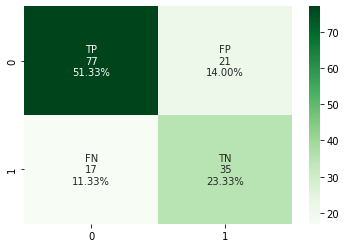

In [ ]:
lr_under = LogisticRegression(solver='newton-cg', penalty='l2', l1_ratio=0.365, class_weight='balanced', C= 6.96, tol = 0.482)
pipe_lr_under = imbpipeline([('under', RandomUnderSampler(random_state=1)), ("logis", LogisticRegression(random_state=1,max_iter=1000,tol=0.0001))])
pipe_lr_under.fit(X_train,Y_train)
evaluation(pipe_lr_under,X_test,Y_test, X_train,Y_train)

* The model have all metrics just above average a little bit. 
* It can be said that the gap between recall in class 0 and class 1 is not large only 0.12, with 0.79 and 0.67 respectively. The recall score is calculate by taking `True Positive (TP) / (True Positive (TP) + False Negative)`. This is call True Positive rate and it can tell us that how many patients at specific class being classified correctly. In this case, the recall score for class 0 is higher - with 79% of correctly that model classifies patient who would not develop sepssis -> actually not develop sepssis in their period at ICU. Also, in class 1 the model also classifies moderated number of patient who would likely to develop sepssis -> to actually have sepssis during their stay, with 65%. This rate is somehow quite low with only the rate of False Negative reduce to only 11.33%. The number of record is 17 compared to around ~29-33 records in above model. 
* The precision score is calculated by taking `True Positive (TP)/ (True Positive + False Positive)`. In term of precision score, model has high probability of correct prediction of class 0. However, when it comes to class 1, the precision score is quite low, at 0.62 - model does not perform accurately when it predicts the class 1. This low rate can possibly be caused by the increase of False Positive and reduction of True Positive. 

### Model 6: Logistic Regression with regulization + SMOTE

In [ ]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)
# Then search
train_performace = list()
valid_performace = list()
for lambda_para in lambda_paras:
	clf = LogisticRegression(penalty='l2', C =1/lambda_para, 
                             random_state=1, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced',  tol=0.0001, l1_ratio=0.1)
								# define pipeline		
	pipeline_smote_lr = imbpipeline(steps =
[['smote', SMOTE(sampling_strategy='minority',random_state=1)],
['logis', clf]])
	
    #create a classifier with a different lambda value
	model =pipeline_smote_lr.fit(X_train, Y_train)        #train the classifier
	train_pred = model.predict(X_train)
	train_f1 = f1_score(Y_train, train_pred)   #calculate the train f1-score
	val_pred = model.predict(X_test)
	val_f1 = f1_score(Y_test, val_pred)         #calculate the validation f1-score
	train_performace.append(train_f1)
	valid_performace.append(val_f1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear

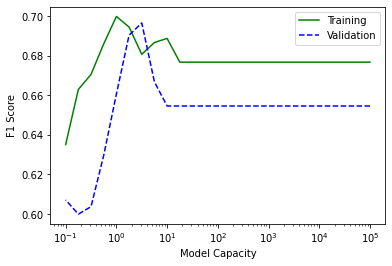

In [ ]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'g-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [ ]:
result = zip(train_performace,valid_performace)
# print(list(result))
print('\n'.join('{}: {}'.format(*k) for k in enumerate(result)))

0: (0.6766467065868264, 0.6545454545454545)
1: (0.6766467065868264, 0.6545454545454545)
2: (0.6766467065868264, 0.6545454545454545)
3: (0.6766467065868264, 0.6545454545454545)
4: (0.6766467065868264, 0.6545454545454545)
5: (0.6766467065868264, 0.6545454545454545)
6: (0.6766467065868264, 0.6545454545454545)
7: (0.6766467065868264, 0.6545454545454545)
8: (0.6766467065868264, 0.6545454545454545)
9: (0.6766467065868264, 0.6545454545454545)
10: (0.6766467065868264, 0.6545454545454545)
11: (0.6766467065868264, 0.6545454545454545)
12: (0.6766467065868264, 0.6545454545454545)
13: (0.6766467065868264, 0.6545454545454545)
14: (0.6766467065868264, 0.6545454545454545)
15: (0.6766467065868264, 0.6545454545454545)
16: (0.688622754491018, 0.6545454545454545)
17: (0.6865671641791045, 0.6666666666666666)
18: (0.6805970149253732, 0.6964285714285715)
19: (0.6943620178041544, 0.6902654867256638)
20: (0.6997084548104956, 0.6605504587155963)
21: (0.685878962536023, 0.6296296296296297)
22: (0.670487106017192

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(




------------ Evaluation metrics --------------
Accuracy  | Test: 76.667, Train: 77.232, Difference: 0.565
Precision  | Test: 63.934, Train: 64.324, Difference: 0.390
Recall       | Test: 75.000, Train: 76.774, Difference: 1.774
F1 score   | Test: 69.027, Train: 70.000, Difference: 0.973
ROC - AUC   | Test: 76.276, Train: 77.124, Difference: 0.849
MAE         | Test: 0.233, Train: 0.228, (Test - Train) : 0.006
MSE         | Test: 0.233, Train: 0.228, (Test - Train) : 0.006
------------ Classification Report --------------
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        98
           1       0.64      0.75      0.69        52

    accuracy                           0.77       150
   macro avg       0.75      0.76      0.75       150
weighted avg       0.78      0.77      0.77       150

------------ Confusion Matrix --------------
Confusion Matrix:
 [[76 22]
 [13 39]]


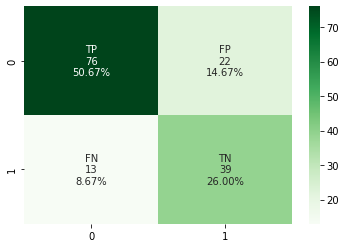

In [ ]:
clf = LogisticRegression(penalty='l2', C = 1.72, 
                    	 random_state=1,solver='liblinear', max_iter=1000 , 
                         class_weight='balanced', l1_ratio=0.1, tol=0.0001) 						 
pipeline_smote = imbpipeline(steps =
[['smote', SMOTE(sampling_strategy='minority',random_state=1)],
['logis', clf]])
	
model_lr = pipeline_smote.fit(X_train, Y_train) 
evaluation(model_lr,X_test,Y_test,X_train,Y_train)


In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
stratifiedkf=StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
score=cross_val_score(clf,X_train,Y_train,cv=stratifiedkf,scoring='f1')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

In [ ]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.65714286 0.72972973 0.61538462 0.76470588 0.6875    ]
Average Cross Validation score :0.6908926169220286


* The average F1_score on cross validation is 0.69 which is the second highest F1_score among above all F1 scores.

* This model have the `F1 score of 0.69 - recall of 0.75 - precision of 0.64 - accuracy of 76.7%`. However, until any further determination, we need to perform evaluation on this model. 

* Depriving from classification table and confusion matrix, the number of patients being clasified accurately at class 0 has an precision 0.85 which is a high score compared to the number of patients being classified at class 1 by the model only 0.59 above the average a little bit which is not a good model in predicting the patient who needs to stay longer at the hospital.

* It can be said that the gap between recall in class 0 and class 1 is not large only 0.03, with 0.78 and 0.75 respectively. The recall score tells us that the probability of True Positive (TP) predictions from all positive samples in dataset. Model has moderatedly good ability to classify both class 0 and 1, with more than 3/4 correct record. This is call True Positive rate and it can tell us that how many patients at specific class being classified correctly. The decrease in False Negative might leads to the significant improvement in recall score. 

* The recall seems to be good enough, now let look at the precision score. The precision score is calculated by taking `True Positive (TP)/ (True Positive + False Positive)`. In this case, the model has high probability of correct prediction of class 0 with score of 0.85 or 85% of correctly differ the patient with “Negative ” label on sepssis class from the other. On the other hand, when it comes to class 1, the precision score is pretty lower, at 0.64 or 64%. This can tell that model does not perform accurately when it predicts the class 1. This low rate can possibly be caused by the increase of False Positive and reduction of True Positive. 
* Let take the motivation after the model development, we care about ***"mitigate the risk of health complications, and managing the ICU resources (such as bed availability, etc.)"***. Since we both want to correctly  as much patient with high probability to develop sepssis as possible ( Detecting positive) while reduce the resource need to take care of them. In this case, F1 is good unit of measurement that only care about positive, and is the harmonic mean between precision and recall.

* The False Positive which occupies 14.67% to the confusion matrix is an acceptable rate, although not the best, this rate won't put the pressure in ICU resources (such as bed availability, etc.). The model still misclassifies the patients who would not likely to develop sepssis (True Label 0) to be likely to develop sepssis (Predicted Label 1). But still, it is better to do the opposite situation. 

* Therefore, this score must be considerably higher than average. In this case, the model which classifies the patient that would not develop sepssis is well enough, with F1 score for the class 0 is 0.81. Additionally, the F1 score for class 0 is 0.69, which have been significantly improved ever seen, and is one of the best F1 score of all above. 
 

# Ultimate Judgement and Analysis
So far `Logistic Regression` is the best approach among those models and methods to use in the real world with our problem based on below criteria: 
* Logistic Regression is not overfitting easily compared to other model. 

* It provides the smallest generalization GAP. With F1 score of 69% in testing dataset and 70% in the training dataset. 

* Accruracy is the highest with 76% on testing set, with the smallest different compared to training accuracy of 77.232%. 

* False Negative is lowest 8.67%. 

* The accuracy when classified the patient in class 1 is the second highest (0.64)

* The ability to detect a class 0 and 1 is nearest to each other, and is considerably high of 75%. 

***Machine Learning model issue discussion:***

From the table below we can say that: 

<img src="./Model_Comparison.png" alt="Table compares all models" style="height: 280px; width:850px;"/>

* First I will discuss about the overfitting problem, Decision Tree without Hyperparameter Tuning and Random Forest seems to be overfitted with 100% of accuracy in the training dataset, but perform poorly in the testing dataset around 50%. The other models still have a considerable GAP between the accuracy or F1 score in the testing and training dataset  > 5%, which is Decision Tree with hyperparameter tuning and base model of logistic regression (without regulization). However, in models with resampling techniques applied in the pipeline with Logistic Regression -> the model seems not to be overfitted. With the application of regularisation in Logistic Regression, the model is prevented from being overfitting as we put penalty in the parameter. This is such an important things to note, as in the base model which is without regularisation we saw a huge generalisation GAP, and the significant higher accuracy on the training dataset. 

* According to the dataset, the accuracy of Logistic Regression with Regularisation + SMOTE technique is the highest among those 4 models which is ***76.7%***. As already mentioned before, the accuracy score is optimal evaluation metrics for this issue, and also this metric is not wisely used to evaluate the imbalanced dataset, however, this also needed to be taken into account in our case. 
The most important metric we want to notice is F1 score. Among all the models, the Logistic Regression with Regularisation + SMOTE technique have the highest score - it is stable in the cross validation process with 0.6908 as a mean for 5-folds.  This model is the one that have most generalized characteristic as the GAP of F1 between train and test sets is quite small 0.98. 

* According to confusion matrix report of each model, Logisitic Regression with regularisation and SMOTE Technique have the best False Negative of 8.47% (patient who is likely to develop sepssis but is predicted not to), and considerated low False Positive of 14.67%. The model is also good at predicting who is not likely to develop a sepssis with nearly 0.8 percentage of accuracy in recall. It can be able to determine how many patients at class 0 being classified correctly. While precision of class 0 can also tells us that model is good at  differ one class 0  from all others. 
* Taking context of the problem to this model, we care about 2 factors mitigate the risk and manage the resource of ICU well. In the first purpose, the chosen model is pretty well achieved. As the dataset is imbalanced and many cases is reported not to develop a sepssis during their stay at ICU. The model do it greatest job with 70% to detect the patient who is likely to develop sepssis. The noticeable thing here is the model have the lowest rate of False Negative. Since we more care about the positive detecting, we want to “Predict if a given in ICU would not develop a sepsis (Sepsis Negative / class 0) or will develop sepsis (Sepsis Positive / class 1) during their ICU stay”. And Sepssis is a life-threatening infection, we wants to minimize the rate of False Negative in our model, with good F1 score. In this case, the F1 score of 0.7 or 70% is acceptable.
* In term of resource management for ICU, the model can be able to detect and predict class 0 accurately with presion and recall of 0.85 and 0.78, respectively -> F1 score is 0.81 in the class 0. But at the same time, it is still can detect and predict the patient with class 1 at a moderated rate. Although, the False Positive rate is not the lowest in all above confusion matrix, it is a good rate of 14.67%. This won't put much pressure on the resource since we only incorrectly patient is is not likely to develop sepssis to have sepssis, but not much so the resource spend to check up on them is not much. 

* Limitation of chosen model: 
- It establishes linear boundaries. Logistic regression requires a linear relationship between the independent variables and the log odds.
- The primary constraint for Logistic Regression is the linear relationship between the dependent and independent variables.
- Algorithms that are more powerful and compact, such as Neural Networks, can easily surpass this one.




# Save the model 

In [ ]:
import joblib
# joblib.dump(clf, "./logistic_regression.joblib")
joblib.dump(pipeline_smote, "./pipeline_smote_lr.joblib")

['./pipeline_smote_lr.joblib']

In [ ]:
prediction_dt['Sepssis'] = pipeline_smote.predict(test_dt)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
prediction_dt['Sepssis']

0      0
1      0
2      0
3      0
4      1
      ..
164    0
165    0
166    0
167    0
168    0
Name: Sepssis, Length: 169, dtype: int64

In [ ]:
prediction_dt['Sepssis']=prediction_dt['Sepssis'].replace(0,'Negative')

In [ ]:
prediction_dt['Sepssis']=prediction_dt['Sepssis'].replace(1,'Positive')

In [190]:
prediction_dt.to_csv('s38751881_predictions.csv', header=True , index =False)


# Reference Lists: 
[1] Mehreen Saeed, October 22, 2021. Accessed on: Apr. 5, 2022. https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/

[2] Science Direct Overview, Accessed on: Apr. 5, 2022.https://www.sciencedirect.com/topics/computer-science/decision-tree-classifier#:~:text=The%20decision%20tree%20acquires%20knowledgeat%20different%20stages%20of%20classification.

[3] Mukesh Mithrakumar,Nov 12, 2019. Accessed on:Apr. 5, 2022. https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

[4] Jason Brownlee,Nov 12, 2019. Accessed on:Apr. 5, 2022. https://machinelearningmastery.com/overfitting-machine-learning-models/

[5] Jason Wong Nov 15, 2020. Accessed on: Apr. 6, 2022. https://towardsdatascience.com/machine-learning-pipelines-with-scikit-learn-d43c32a6aa52

[6] Kenneth Leung, Jan 04 2022. Accessed on:  Apr. 6, 2022. https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f#989c

[7] SWASTIK SATPATHY October 6, 2020. Accessed on:  Apr. 6, 2022. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

[8] Irene P Feb 22, 2021. Accessed on:  Apr. 6, 2022. https://towardsdatascience.com/performance-metrics-for-binary-classifier-in-simple-words-be958535db49

[9] Cornellius Yudha Wijaya Sep 14, 2020. Accessed on:  Apr. 6, 2022. https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

[10] Finn Qiao Jan 9, 2019. Accessed on:  Apr. 6, 2022. https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5